From the MNIST dataset, create a new dataset by taking first 10000 images for training and next 2000 images for testing.

Collect all digit-5 (Positive class) and digit-3 (Negative class) images and stack them properly as a single datamatrix.

By convention, keep all digit-5 images from index 0 to i followed by digit-3 images from index i+1 to n (i denotes the end index of digit-5 images)
Similarly, collect the respective labels and store it in a variable (Do sanity check).

Set the label values to 1 for positive class and -1 for negative class.

Instantiate a perceptron classifier with the below parameters

random_state = 42

learning rate = 1

Train for 100 iterations (epoch)

Should shuffle the dataset for each epoch (iteration)

Include the intercept (bias) term.

No regularization

Use the training set for fitting the perceptron model and use the test data to make the predictions. Answer the below questions.

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)  # Convert labels to integer

# Select first 10,000 images for training and next 2,000 for testing
X_train, y_train = X[:10000], y[:10000]
X_test, y_test = X[10000:12000], y[10000:12000]

# Separate all digit-5 images first, followed by digit-3
X_train_5 = X_train[y_train == 5]  # Extract all '5' images
X_train_3 = X_train[y_train == 3]  # Extract all '3' images

X_test_5 = X_test[y_test == 5]  # Extract all '5' images in test
X_test_3 = X_test[y_test == 3]  # Extract all '3' images in test

# Stack them properly (5s first, then 3s)
X_train_filtered = np.vstack((X_train_5, X_train_3))
X_test_filtered = np.vstack((X_test_5, X_test_3))

# Labels: 5 -> 1, 3 -> -1
y_train_filtered = np.hstack((np.ones(len(X_train_5)), -np.ones(len(X_train_3))))
y_test_filtered = np.hstack((np.ones(len(X_test_5)), -np.ones(len(X_test_3))))

# Count training samples
num_digit_5_train = len(X_train_5)
num_digit_3_train = len(X_train_3)

print(f"Number of training samples for digit 5: {num_digit_5_train}")
print(f"Number of training samples for digit 3: {num_digit_3_train}")


Number of training samples for digit 5: 863
Number of training samples for digit 3: 1032


In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix

# Train a Perceptron model
clf = Perceptron(max_iter=100, eta0=1, random_state=42, shuffle=True)
clf.fit(X_train_filtered, y_train_filtered)

# Predict on test data
y_pred = clf.predict(X_test_filtered)

# Compute confusion matrix
cm = confusion_matrix(y_test_filtered, y_pred, labels=[1, -1])
tn, fp, fn, tp = cm.ravel()  # Extract values

# # Display results
# print("Confusion Matrix:")
# print(cm)
# print(f"True Positives (TP): {tp}")




Confusion Matrix:
[[173  12]
 [  6 190]]
True Positives (TP): 190


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train a Perceptron model with shuffle=False
clf_no_shuffle = Perceptron(max_iter=100, eta0=1, random_state=42, shuffle=True)
clf_no_shuffle.fit(X_train_filtered, y_train_filtered)

# Predict on test data
y_pred_no_shuffle = clf_no_shuffle.predict(X_test_filtered)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_filtered, y_pred_no_shuffle)
precision = precision_score(y_test_filtered, y_pred_no_shuffle, pos_label=1)
recall = recall_score(y_test_filtered, y_pred_no_shuffle, pos_label=1)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9528
Precision: 0.9665
Recall: 0.9351


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train a Perceptron model with shuffle=False
clf_no_shuffle = Perceptron(max_iter=100, eta0=1, random_state=42, shuffle=False)
clf_no_shuffle.fit(X_train_filtered, y_train_filtered)

# Predict on test data
y_pred_no_shuffle = clf_no_shuffle.predict(X_test_filtered)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_filtered, y_pred_no_shuffle)
precision = precision_score(y_test_filtered, y_pred_no_shuffle, pos_label=1)
recall = recall_score(y_test_filtered, y_pred_no_shuffle, pos_label=1)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.5486
Precision: 1.0000
Recall: 0.0703


In [10]:
# Use MNIST dataset. Store all the samples in 
# X
# X and labels in 
# y
# y.
 
#   Split the dataset in the following ratio.
#  Training : Take the first 70% of samples from 
# X
# X and store them in x_train
#  Testing: Take the remaining 30% of samples from 
# X
# X and store them in x_test
#   Store the respective labels in y_train,y_test respectively.

#    The last training sample is of digit __?

X, y = fetch_openml('mnist_784', version=1, as_frame=False, return_X_y=True)

# Split the dataset
split_ratio = 0.7
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Last training sample
last_training_sample = y_train[-1]
print(f"The last training sample is of digit {last_training_sample}")

The last training sample is of digit 6


In [12]:
# Build a classifier that differentiates digit 6 from digit 9.
# Steps to be followed
# 1. Collect all digit-6 (Positive class) and digit-9 (Negative class) images from x_train and stack them properly as a single data matrix x_train_69.
# 2. Keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
# 3. Similarly, collect the respective labels and store it in a variable y_train_69
# 4. Set the label values to 1 for positive classes and 0 for negative classes.
# 5. Load from sklearn.utils import shuffle
# 6. Shuffle the data matrix and labels. (Set random_state value to 1729).
# 7. Create x_test_69 and y_test_69 by repeating the steps from 1 to 6 with required modifications.

# What is the sum of all the labels in the vector y_train_69.

# Hint:-
# Use X-train, y_train as input to get  x_train_69 and y_train_69 and
# X_test , y_test as input  to get  x_test_69 and y_test_69

from sklearn.utils import shuffle

def get_binary_data(X, y, digit1, digit2):
    # Select all digit-6 images
    X_digit1 = X[y == digit1]
    # Select all digit-9 images
    X_digit2 = X[y == digit2]

    # Stack them properly
    X_combined = np.vstack((X_digit1, X_digit2))

    # Labels: 1 for digit1, 0 for digit2
    y_combined = np.hstack((np.ones(len(X_digit1)), np.zeros(len(X_digit2))))

    # Shuffle the data
    X_combined, y_combined = shuffle(X_combined, y_combined, random_state=1729)

    return X_combined, y_combined

# Get binary data for digits 6 and 9
X_train_69, y_train_69 = get_binary_data(X_train, y_train, '6', '9')
X_test_69, y_test_69 = get_binary_data(X_test, y_test, '6', '9')

# Sum of all labels in y_train_69
sum_labels = y_train_69.sum()

print(f"Sum of all labels in y_train_69: {sum_labels}")

Sum of all labels in y_train_69: 4855.0


In [13]:
# What is the sum of all the labels in the vector y_test_69.
sum_labels = y_test_69.sum()
print(f"Sum of all labels in y_test_69: {sum_labels}")

Sum of all labels in y_test_69: 2021.0


In [14]:
# Apply StandardScaler to all the training samples in x_train_69 and store the result in another variable (say, x_train_69Tf).

#      * What is the mean of the zeroth sample?
#      * What is the mean of zeroth feature?
#      * What is the standard deviation of the zeroth sample?
#      * What is the standard deviation of the zeroth feature?

from sklearn.preprocessing import StandardScaler
x_train_69tf = StandardScaler().fit_transform(X_train_69)

# Mean of the zeroth sample
mean_sample = x_train_69tf[0].mean()

# Mean of zeroth feature
mean_feature = x_train_69tf[:, 0].mean()

# Standard deviation of the zeroth sample
std_sample = x_train_69tf[0].std()

# Standard deviation of the zeroth feature
std_feature = x_train_69tf[:, 0].std()


print(f"Mean of the zeroth sample: {mean_sample:.4f}")
print(f"Mean of zeroth feature: {mean_feature:.4f}")
print(f"Standard deviation of the zeroth sample: {std_sample:.4f}")
print(f"Standard deviation of the zeroth feature: {std_feature:.4f}")

Mean of the zeroth sample: 0.0813
Mean of zeroth feature: 0.0000
Standard deviation of the zeroth sample: 0.7359
Standard deviation of the zeroth feature: 0.0000


In [ ]:
# Train the LogisticRegression model using SGDClassifier() with the following common settings.

# 1. No Regularization
# 2. random_state : 10
# 3. Iteration : 10

# Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve decreased monotonically?

# A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

# B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` .

# C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.

# D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

x_train_69 = X_train_69.copy()

from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize the model
clf = SGDClassifier(loss='log_loss', penalty=None, max_iter=10, random_state=10, learning_rate='constant', eta0=0.01)

# Fit the model
clf.fit(x_train_69, y_train_69)

# Capture the loss values
loss_001 = clf.loss_curve_

# Initialize the model
clf = SGDClassifier(loss='log_loss', penalty=None, max_iter=10, random_state=10, learning_rate='constant', eta0=0.000001)

# Fit the model
clf.fit(x_train_69, y_train_69)

# Capture the loss values
loss_000001 = clf.loss_curve_

# Initialize the model
clf = SGDClassifier(loss='log_loss', penalty=None, max_iter=10, random_state=10, learning_rate='constant', eta0=0.01)

# Scale the samples
x_train_69tf = StandardScaler().fit_transform(x_train_69)

# Fit the model
clf.fit(x_train_69tf, y_train_69)

# Capture the loss values
loss_001_tf = clf.loss_curve_

# Initialize the model
clf = SGDClassifier(loss='log_loss', penalty=None, max_iter=10, random_state=10, learning_rate='invscaling', eta0=0.01, power_t=1)

# Fit the model
clf.fit(x_train_69, y_train_69)

# Capture the loss values
loss_invscaling = clf.loss_curve_

# Plot the iteration vs loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_001, label='Learning rate: 0.01')
plt.plot(loss_000001, label='Learning rate: 0.000001')
plt.plot(loss_001_tf, label='Learning rate: 0.01 (Scaled)')
plt.plot(loss_invscaling, label='Learning rate: invscaling')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()



ValueError: classes should include all valid labels that can be in y

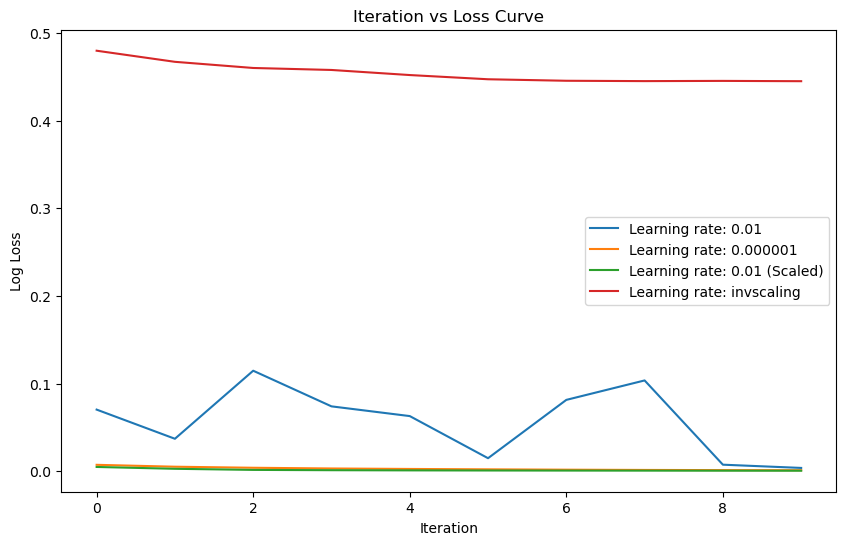

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Helper function to track loss manually
def train_and_track_loss(clf, X, y, n_iter=10):
    """Tracks loss over iterations using partial_fit()."""
    losses = []
    unique_classes = np.unique(y)  # Extract actual class labels
    for _ in range(n_iter):
        clf.partial_fit(X, y, classes=unique_classes)  # Use correct class labels
        y_pred_prob = clf.predict_proba(X)[:, 1]  # Get probability estimates
        losses.append(log_loss(y, y_pred_prob))  # Compute log loss
    return losses


# Data Copy
x_train_69 = X_train_69.copy()
y_train_69 = y_train_69.copy()

# --- A. Learning Rate: 0.01 ---
clf_001 = SGDClassifier(loss='log_loss', penalty=None, random_state=10, learning_rate='constant', eta0=0.01)
loss_001 = train_and_track_loss(clf_001, x_train_69, y_train_69)

# --- B. Learning Rate: 0.000001 ---
clf_000001 = SGDClassifier(loss='log_loss', penalty=None, random_state=10, learning_rate='constant', eta0=0.000001)
loss_000001 = train_and_track_loss(clf_000001, x_train_69, y_train_69)

# --- C. Learning Rate: 0.01 with StandardScaler ---
scaler = StandardScaler()
x_train_69_scaled = scaler.fit_transform(x_train_69)

clf_001_scaled = SGDClassifier(loss='log_loss', penalty=None, random_state=10, learning_rate='constant', eta0=0.01)
loss_001_scaled = train_and_track_loss(clf_001_scaled, x_train_69_scaled, y_train_69)

# --- D. Learning Rate: invscaling ---
clf_invscaling = SGDClassifier(loss='log_loss', penalty=None, random_state=10, learning_rate='invscaling', eta0=0.01, power_t=1)
loss_invscaling = train_and_track_loss(clf_invscaling, x_train_69, y_train_69)

# --- Plot Iteration vs Loss ---
plt.figure(figsize=(10, 6))
plt.plot(loss_001, label='Learning rate: 0.01')
plt.plot(loss_000001, label='Learning rate: 0.000001')
plt.plot(loss_001_scaled, label='Learning rate: 0.01 (Scaled)')
plt.plot(loss_invscaling, label='Learning rate: invscaling')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Iteration vs Loss Curve')
plt.show()


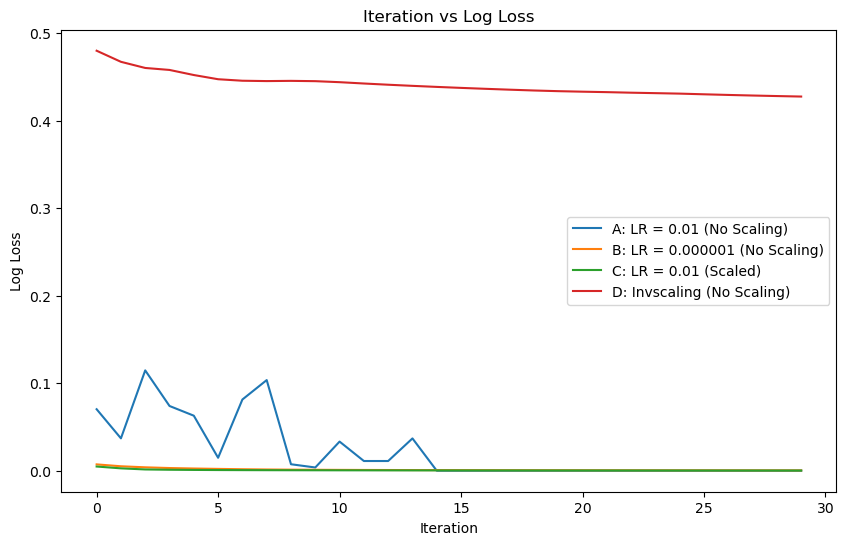

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Function to track loss over iterations
def train_and_track_loss(clf, X, y, n_iter=30):
    losses = []
    unique_classes = np.unique(y)  # Ensure valid class labels
    for _ in range(n_iter):
        clf.partial_fit(X, y, classes=unique_classes)  # Incremental learning
        y_pred_prob = clf.predict_proba(X)[:, 1]  # Get probability estimates
        losses.append(log_loss(y, y_pred_prob))  # Compute log loss
    return losses

# Prepare datasets
X_scaled = StandardScaler().fit_transform(X_train_69)  # Preprocessed version

# Model A: Learning Rate 0.01 (No Scaling)
clf_A = SGDClassifier(loss='log_loss', penalty=None, max_iter=1, random_state=10, learning_rate='constant', eta0=0.01)
loss_A = train_and_track_loss(clf_A, X_train_69, y_train_69)

# Model B: Learning Rate 0.000001 (No Scaling)
clf_B = SGDClassifier(loss='log_loss', penalty=None, max_iter=1, random_state=10, learning_rate='constant', eta0=0.000001)
loss_B = train_and_track_loss(clf_B, X_train_69, y_train_69)

# Model C: Learning Rate 0.01 (With Standard Scaling)
clf_C = SGDClassifier(loss='log_loss', penalty=None, max_iter=1, random_state=10, learning_rate='constant', eta0=0.01)
loss_C = train_and_track_loss(clf_C, X_scaled, y_train_69)  # Use scaled data

# Model D: Invscaling strategy with power_t=1
clf_D = SGDClassifier(loss='log_loss', penalty=None, max_iter=1, random_state=10, learning_rate='invscaling', eta0=0.01, power_t=1)
loss_D = train_and_track_loss(clf_D, X_train_69, y_train_69)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(loss_A, label='A: LR = 0.01 (No Scaling)')
plt.plot(loss_B, label='B: LR = 0.000001 (No Scaling)')
plt.plot(loss_C, label='C: LR = 0.01 (Scaled)')
plt.plot(loss_D, label='D: Invscaling (No Scaling)')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Iteration vs Log Loss')
plt.show()


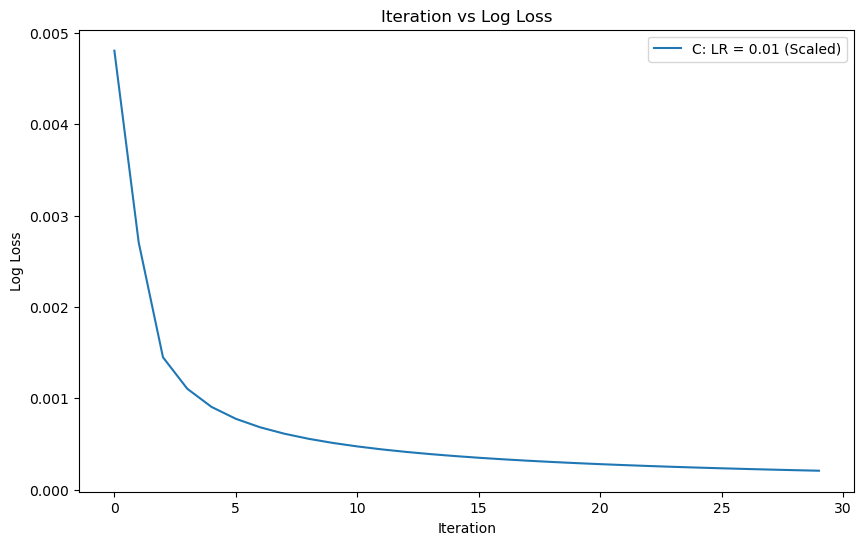

Loss reaches zero at iteration None.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Function to track loss over iterations
def train_and_track_loss(clf, X, y, n_iter=30):
    losses = []
    zero_loss_iter = None  # To store the iteration when loss first reaches 0
    unique_classes = np.unique(y)  # Ensure valid class labels

    for i in range(n_iter):
        clf.partial_fit(X, y, classes=unique_classes)  # Incremental learning
        y_pred_prob = clf.predict_proba(X)[:, 1]  # Get probability estimates
        loss = log_loss(y, y_pred_prob)  # Compute log loss
        losses.append(loss)

        # Check when loss first reaches 0 and remains 0
        if loss == 0 and zero_loss_iter is None:
            zero_loss_iter = i

    return losses, zero_loss_iter

# Prepare datasets
X_scaled = StandardScaler().fit_transform(X_train_69)  # Preprocessed version

# Model C: Learning Rate 0.01 (With Standard Scaling)
clf_C = SGDClassifier(loss='log_loss', penalty=None, max_iter=1, random_state=10, learning_rate='constant', eta0=0.01)
loss_C, zero_loss_iter = train_and_track_loss(clf_C, X_scaled, y_train_69)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(loss_C, label='C: LR = 0.01 (Scaled)')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Iteration vs Log Loss')
plt.show()

# Print the iteration when loss reaches 0
print(f"Loss reaches zero at iteration {zero_loss_iter}.")


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# Example Data (Replace with your own dataset)
X_train = np.random.randn(1000, 20)  # 1000 samples, 20 features
y_train = np.random.choice([-1, 1], size=1000)  # Binary labels {-1, 1}

# Initialize SGDClassifier with verbose logging
clf = SGDClassifier(loss="log_loss", penalty=None, max_iter=30, random_state=10, learning_rate="constant", eta0=0.01)

# Fit the model
clf.fit(X_train, y_train)

# Extract loss curve
losses = clf.loss_curve_

# Plot loss vs iterations
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs Loss Curve")
plt.grid(True)
plt.show()


AttributeError: 'SGDClassifier' object has no attribute 'loss_curve_'